# Fall 2020 -> INSY 5376 -> Big Data & Deep Learning
## Homework 3
### Name: Phanikrishna Karanam (UTA ID# 1001851985)

#### Assignment on building a classfication model using Deep Learning & traditional Machine Learning models

__Summary__: 
The goal of this homework is to predict the source journal given the Title + Abstract using various Deep Learning and traditional Machine Learning models and compare the results 

__About Dataset__: 
The file contains the following fields/columns: TI, AB, and SO. These are explained below:
 - TI : Title of abstract
 - AB : Abstract of the article
 - SO : Source journal in which the article appeared

In [1]:
# Ignore warnings and change the current directory to location where input file is present
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r'C:\MSBA\Fall 2020\INSY 5376 - Big Data\Assignments\3')

Read the input file (xls format) into a Pandas Dataframe:
 - Fill any null values in TI and AB columns with blanks 
 - Concatenate the TI and AB columns

In [2]:
import pandas as pd
import numpy as np

# set below option to review complete DataFrame column width in output cells
pd.set_option('max_colwidth', -1)

name = 'us_data_subset.xlsx'
df = pd.read_excel(name)
df_copy = df.copy()

df[['TI','AB']] = df[['TI','AB']].fillna('') 
df['TI+AB'] = df['TI'] + ' ' + df['AB']
df

,TI,AB,SO,TI+AB
0,The Role of Business Intelligence and Communication Technologies in Organizational Agility: A Configurational Approach,"This study examines the role that business intelligence (BI) and communication technologies play in how firms may achieve organizational sensing agility, decision making agility, and acting agility in different organizational and environmental contexts. Based on the information-processing view of organizations and dynamic capability theory, we suggest a configurational analytic framework that departs from the standard linear paradigm to examine how IT's effect on agility is embedded in a configuration of organizational and environmental elements. In line with this approach, we use fuzzy-set qualitative comparative analysis (fsQCA) to analyze field survey data from diverse industries. Our findings suggest equifinal pathways to organizational agility and the specific boundary conditions of our middle-range theory that determine what role BI and communication technologies play in organizations' achieving organizational agility. We discuss implications for theory and practice and discuss future research avenues.",JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS,"The Role of Business Intelligence and Communication Technologies in Organizational Agility: A Configurational Approach This study examines the role that business intelligence (BI) and communication technologies play in how firms may achieve organizational sensing agility, decision making agility, and acting agility in different organizational and environmental contexts. Based on the information-processing view of organizations and dynamic capability theory, we suggest a configurational analytic framework that departs from the standard linear paradigm to examine how IT's effect on agility is embedded in a configuration of organizational and environmental elements. In line with this approach, we use fuzzy-set qualitative comparative analysis (fsQCA) to analyze field survey data from diverse industries. Our findings suggest equifinal pathways to organizational agility and the specific boundary conditions of our middle-range theory that determine what role BI and communication technologies play in organizations' achieving organizational agility. We discuss implications for theory and practice and discuss future research avenues."
1,"OPERATIONAL IT FAILURES, IT VALUE DESTRUCTION, AND BOARD-LEVEL IT GOVERNANCE CHANGES","This paper presents an empirical study of changes that firms implement in their board-level IT governance (ITG) upon experiencing operational IT failures. Consistent with the separation of oversight from management decisions, board-level ITG is responsible for monitoring managerial IT decisions and policies for controlling IT resources. We expect that operational IT failures indicating inadequacies in board monitoring of controls over IT resources would result in a negative stock market reaction and, in turn, induce firms to improve their board-level ITG. Our expectation is confirmed based on a sample of 110 operational IT failures from U.S. public financial firms. Specifically, our results demonstrate that subsequent to experiencing operational IT failures, firms make improvements to the IT competency level of their boards, and the improvements are proportional to the degree of negative market reaction. However, those improvements are only on the executive side of the board, namely: an increase in the IT experience of internal (executive) directors and an increased turnover rate of CIOs serving on the board. Furthermore, the likelihood of CIO turnover is lower in IT-intensive firms where such turnover could be more disruptive. Our results contribute to understanding the critical connection between operational IT failures and board-level ITG.",MIS QUARTERLY,"OPERATIONAL IT FAILURES, IT VALUE DESTRUCTION, AND BOARD-LEVEL IT GOVERNANCE CHANGES This paper presents an empirical study of changes that firms implement in their board

 - Drop the TI and AB columns (since we have merged data already in TI+AB column)
 - Convert the input text into lower case
 - Label encode the target variable into integers by mapping as required

In [3]:
df = df.drop(['TI','AB'], axis = 1)

df['TI+AB'] = df['TI+AB'].str.lower()

target_dict = {'JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS': 0,
              'MIS QUARTERLY': 1,
              'INFORMATION SYSTEMS RESEARCH': 2,
              'JOURNAL OF MANAGEMENT INFORMATION SYSTEMS': 3}

df['SO'] = df['SO'].map(target_dict) 
df.head()

,SO,TI+AB
0,0,"the role of business intelligence and communication technologies in organizational agility: a configurational approach this study examines the role that business intelligence (bi) and communication technologies play in how firms may achieve organizational sensing agility, decision making agility, and acting agility in different organizational and environmental contexts. based on the information-processing view of organizations and dynamic capability theory, we suggest a configurational analytic framework that departs from the standard linear paradigm to examine how it's effect on agility is embedded in a configuration of organizational and environmental elements. in line with this approach, we use fuzzy-set qualitative comparative analysis (fsqca) to analyze field survey data from diverse industries. our findings suggest equifinal pathways to organizational agility and the specific boundary conditions of our middle-range theory that determine what role bi and communication technologies play in organizations' achieving organizational agility. we discuss implications for theory and practice and discuss future research avenues."
1,1,"operational it failures, it value destruction, and board-level it governance changes this paper presents an empirical study of changes that firms implement in their board-level it governance (itg) upon experiencing operational it failures. consistent with the separation of oversight from management decisions, board-level itg is responsible for monitoring managerial it decisions and policies for controlling it resources. we expect that operational it failures indicating inadequacies in board monitoring of controls over it resources would result in a negative stock market reaction and, in turn, induce firms to improve their board-level itg. our expectation is confirmed based on a sample of 110 operational it failures from u.s. public financial firms. specifically, our results demonstrate that subsequent to experiencing operational it failures, firms make improvements to the it competency level of their boards, and the improvements are proportional to the degree of negative market reaction. however, those improvements are only on the executive side of the board, namely: an increase in the it experience of internal (executive) directors and an increased turnover rate of cios serving on the board. furthermore, the likelihood of cio turnover is lower in it-intensive firms where such turnover could be more disruptive. our results contribute to understanding the critical connection between operational it failures and board-level itg."
2,1,"on the role of fairness and social distance in designing effective social referral systems online referral systems help firms attract new customers and expand their customer base by leveraging the social relationships of existing customers. we integrate ultimatum game theory, which focuses on fairness, with motivation theories to investigate the effects of social distance and monetary incentives on the performance of three competing designs for online referral systems: rewarding only or primarily the proposer, rewarding only or primarily the responder, and dividing the reward equally or fairly between the proposer and responder. a set of controlled laboratory and randomized field experiments were conducted to test how the fairness of the split of the reward (equal/fair versus unequal/unfair split of the referral bonus) and social distance (small versus large) between the proposer and the responder jointly affect the performance of online referral systems (the proposer sending an offer and the responder accepting the offer). for a large social distance (acquaintances or weak tie relationships), equally splitting the referral bonus results in the best performance. however, for a small social distance (friends or strong tie relationships), an equal split of the referral reward does not improve referral performance, which suggests that under a small social dista

__Set up the Training, Validation, Test data:__
 - The dataset appears to be a decently balanced for 3 out of 4 classes. We will use this as is and ignore the class imbalance
   for 1st class
 - We first split the input data into 2 parts (80% to be used for Train and validation, 20% for for testing)
 - From the 80% data, we further split into 20% as Validation data and remaining as Training data

In [4]:
from sklearn.model_selection import train_test_split

features = df['TI+AB']
target = df['SO']

x_train_val, x_test, y_train_val, y_test = \
                    train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 32)

x_train, x_val, y_train, y_val = \
                    train_test_split(x_train_val, y_train_val, test_size = 0.20, stratify = y_train_val, random_state = 32)

print('x_train_val shape                 :', x_train_val.shape)
print('x_train shape                     :', x_train.shape)
print('x_val shape                       :', x_val.shape)
print('x_test shape                      :', x_test.shape)
print('y_train_val shape & target counts : {} {}'.format(y_train_val.shape, np.unique(y_train_val, return_counts = True)))
print('y_train shape & target counts     : {} {}'.format(y_train.shape, np.unique(y_train, return_counts = True)))
print('y_val shape & target counts       : {} {}'.format(y_val.shape, np.unique(y_val, return_counts = True)))
print('y_test shape & target counts      : {} {}'.format(y_test.shape, np.unique(y_test, return_counts = True)))

x_train_val shape                 : (2284,)
x_train shape                     : (1827,)
x_val shape                       : (457,)
x_test shape                      : (571,)
y_train_val shape & target counts : (2284,) (array([0, 1, 2, 3], dtype=int64), array([384, 642, 635, 623], dtype=int64))
y_train shape & target counts     : (1827,) (array([0, 1, 2, 3], dtype=int64), array([307, 514, 508, 498], dtype=int64))
y_val shape & target counts       : (457,) (array([0, 1, 2, 3], dtype=int64), array([ 77, 128, 127, 125], dtype=int64))
y_test shape & target counts      : (571,) (array([0, 1, 2, 3], dtype=int64), array([ 96, 160, 159, 156], dtype=int64))


__Tokenize the words and chose the vocabulary size:__
 - We use the training and validation data for creating the word vocabulary by using Keras Tokenizer
   - Keras Tokenizer also takes care of preprocessing (like converting text to lower case, handling punctuations)
 - As the input records are low, we will use the entire unique vocabulary in the corpus without limiting it

In [5]:
import tensorflow
import tensorflow.keras as keras
from keras import preprocessing
#from keras.utils import to_categorical

# Below function will tokenize the corpus and create a word vocabulary 

def preprocess_tokenize(x_train_val, vocab_count):
    # Create a tokenizer -> configured to consider entire unique vocabulary
    tokenizer = preprocessing.text.Tokenizer()

    # Can be configured to only take into account the top-N most common words using below
    #tokenizer = preprocessing.text.Tokenizer(num_words = vocab_count)

    # Build the word index using training & validation data only 
    tokenizer.fit_on_texts(x_train_val)

    # Compute word index 
    word_index = tokenizer.word_index
    print('Found {} unique tokens in training data\n'.format(len(word_index)))

    # Currently set to utilize all unique words in input. Use the second option if restricting to limited words
    max_words = len(word_index)
    #max_words = vocab_count - 1
    
    return (tokenizer, word_index, max_words)

__One hot encode the data:__
- One hot encode the input data corresponding to the size of input vocabulary 
- We will use Spare categorical entropy as the loss function. Hence we are not one hot encoding the target variable

In [6]:
# Function to one hot encode the input text with length equal to the word vocabulary 

def onehot_encode(x_train_val, x_train, x_val, x_test, tokenizer):    
    # Convert input words to one-hot binary representations based on word index created using training and validation data
    tokenizer = tokenizer
    x_train_val_one_hot = tokenizer.texts_to_matrix(x_train_val, mode='binary')
    x_train_one_hot = tokenizer.texts_to_matrix(x_train, mode='binary')
    x_val_one_hot = tokenizer.texts_to_matrix(x_val, mode='binary')
    x_test_one_hot = tokenizer.texts_to_matrix(x_test, mode='binary')

    # One hot encode the target variable -> not encoding, instead using sparse categorical cross entropy loss function
    #y_train_one_hot = to_categorical(y_train)
    #y_val_one_hot = to_categorical(y_val)
    #y_test_one_hot = to_categorical(y_test)

    print('x_train_one_hot shape :', x_train_one_hot.shape)
    print('x_val_one_hot shape   :', x_val_one_hot.shape)
    print('x_test_one_hot shape  :', x_test_one_hot.shape)
    print('y_train shape         :', y_train.shape)
    print('y_val shape           :', y_val.shape)
    print('y_test shape          :', y_test.shape)
    print('\n')
    
    return (x_train_val_one_hot, x_train_one_hot, x_val_one_hot, x_test_one_hot)

__Using simple Neural Network and one hot encoded inputs:__
 - Below function will define a simple Neural Network with 2 hidden layers
 - Relu is used for activation in dense layers and a softmax activation for the output nodes
 - Control overfitting by: 
   - Introducing drop out layer after the dense layer 
   - Using L1 and L2 regularization 
 - Sparse categorical cross entropy is the loss function as target variable is not one hot encoded
 - Accuracy is the metric that is being tracked 

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

# Below function will define the simple Neural Network that accepts necessary parameters that can be configured: 
    
def train_model(x_train, y_train, x_val, y_val, max_words, num_hidden_units_1, num_hidden_units_2, 
                epochs, batch_size, learning_rate):
    model_snn = models.Sequential()
    model_snn.add(layers.Dense(num_hidden_units_1, activation = 'relu', input_shape = ((max_words,)),
                           kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
                           #kernel_regularizer = regularizers.l1(0.001)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                           kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
                           #kernel_regularizer = regularizers.l1(0.001)))
    model_snn.add(layers.Dropout(0.5))
    #model_snn.add(layers.Dense(32, activation = 'relu'))
    #model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(4, activation = 'softmax'))
    model_snn.summary()
    
    #model.compile(loss = 'categorical_crossentropy', 
    model_snn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])
    
    history_snn = model_snn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_snn, model_snn)

__Plot the Learning curves for Loss and Accuracy for Training and Validation:__

In [8]:
import matplotlib.pyplot as plt

def plot_learning(history): 
    # Plot the Loss curve 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure

    # Plot the Accuracy curve 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

__Display the Confusion Matrix and Classification Report:__

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

def print_metrics(model, x_test, y_test, target_dict): 
    # model.predict will provide scores for all the classes for target variable (in this case, 4 scores for each record)
    y_test_pred_prob = model.predict(x_test)
    y_test_pred = np.zeros((len(y_test_pred_prob),))

    # Assign the class with highest probability as output label 
    for i in range(len(y_test_pred_prob)):
        y_test_pred[i] = np.argmax(y_test_pred_prob[i])  # pick the index of the class with highest probability value

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))

# 1) Simple Neural Network model
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Found 14362 unique tokens in training data

x_train_one_hot shape : (1827, 14363)
x_val_one_hot shape   : (457, 14363)
x_test_one_hot shape  : (571, 14363)
y_train shape         : (1827,)
y_val shape           : (457,)
y_test shape          : (571,)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                919296    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
To

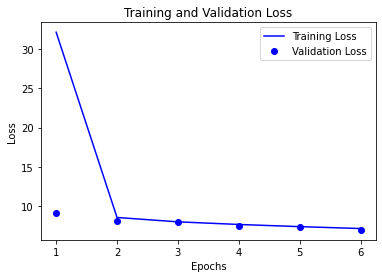

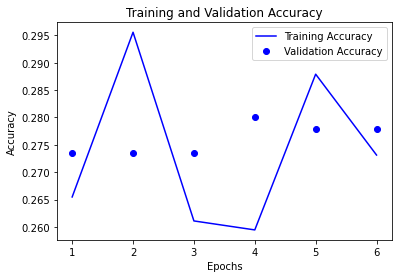

Training Loss & Accuracy: 
58/58 [==============================] - 1s 9ms/step - loss: 6.9773 - accuracy: 0.2813

Validation Loss & Accuracy: 
15/15 [==============================] - 0s 11ms/step - loss: 6.9774 - accuracy: 0.2779

Test Loss & Accuracy: 
18/18 [==============================] - 0s 8ms/step - loss: 6.9772 - accuracy: 0.2785

Confusion Matrix:
 [[  0   0  96   0]
 [  0   0 160   0]
 [  0   0 159   0]
 [  0   0 156   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.00      0.00      0.00       160
                      INFORMATION SYSTEMS RESEARCH       0.28      1.00      0.44       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                      

In [10]:
# Tokenize and proeprocess the input

# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count = 10000)

# One hot encode the input
x_train_val_one_hot, x_train_one_hot, x_val_one_hot, x_test_one_hot = onehot_encode(x_train_val, x_train, 
                                                                                    x_val, x_test, tokenizer)

# Tune the hyper parameters -> hidden units in both layers, epochs, batch size, learning rate
# For updating the L1, L2 regulalizer or drop out values, update in the function where the model is defined

#history, model = train_model(x_train_one_hot, y_train_one_hot, x_val_one_hot, y_val_one_hot, max_words = max_words + 1,  
history_snn, model_snn = train_model(x_train_one_hot, y_train, x_val_one_hot, y_val, max_words = max_words + 1, 
                         num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                         epochs = 6, batch_size = 128, learning_rate = 0.001)

plot_learning(history_snn)

print('Training Loss & Accuracy: ') 
model_snn.evaluate(x_train_one_hot, y_train)

print('\nValidation Loss & Accuracy: ')
model_snn.evaluate(x_val_one_hot, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_snn.evaluate(x_test_one_hot, y_test)

print_metrics(model_snn, x_test_one_hot, y_test, target_dict)

 - Convert the input data into fixed length sequences instead of one hot encoding the values
 - Input length is configurable during model training
 - If input length is less than the chosen fixed length, then it will be padded with leading zeroes

In [11]:
# Convert input to sequence of fixed length tensor 

def inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer):
    # Convert strings into lists of integer indices sequences 
    x_train_seq = tokenizer.texts_to_sequences(x_train)
    x_val_seq = tokenizer.texts_to_sequences(x_val)
    x_test_seq = tokenizer.texts_to_sequences(x_test)

    # Convert lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
    x_train_fixlen = preprocessing.sequence.pad_sequences(x_train_seq, maxlen = inp_max_len)
    x_val_fixlen = preprocessing.sequence.pad_sequences(x_val_seq, maxlen = inp_max_len)
    x_test_fixlen = preprocessing.sequence.pad_sequences(x_test_seq, maxlen = inp_max_len)
    
    print('x_train_fixlen shape :', x_train_fixlen.shape)
    print('x_val_fixlen shape   :', x_val_fixlen.shape)
    print('x_test_fixlen shape  :', x_test_fixlen.shape)
    print('y_train shape        :', y_train.shape)
    print('y_val shape          :', y_val.shape)
    print('y_test shape         :', y_test.shape)
    print('\n')
    
    return (x_train_fixlen, x_val_fixlen, x_test_fixlen)

__Using Word Embeddings (learnt from input corpus):__
 - Entire vocabulary of corpus is being used as number of input records are very low
 - Learn the word embeddings from the input data
 - Flatten the output of the embedding layer and feed into the classification model 
   - Use the same Neural Network which was defined previosuly, after the Embedding layer

In [12]:
# Create a NN model by learning word embeddings with the Embedding layer

def train_emb_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_emb = models.Sequential()
    model_emb.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_emb.add(layers.Flatten())                          
    model_emb.add(layers.Dense(num_hidden_units_1, activation = 'relu',
                               kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
    model_emb.add(layers.Dropout(0.5))
    model_emb.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
    model_emb.add(layers.Dropout(0.5))
    model_emb.add(layers.Dense(4, activation = 'softmax'))

    model_emb.summary()

    model_emb.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_emb = model_emb.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_emb, model_emb)

# 2) Neural Network model using Embeddings learnt from input data
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 14362 unique tokens in training data

x_train_fixlen shape : (1827, 200)
x_val_fixlen shape   : (457, 200)
x_test_fixlen shape  : (571, 200)
y_train shape        : (1827,)
y_val shape          : (457,)
y_test shape         : (571,)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           459616    
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
____________

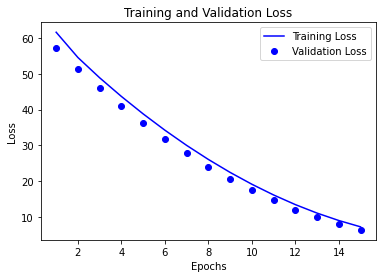

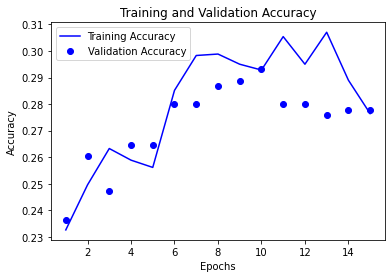

Training Loss & Accuracy: 
58/58 [==============================] - 0s 4ms/step - loss: 6.3064 - accuracy: 0.2781

Validation Loss & Accuracy: 
15/15 [==============================] - 0s 4ms/step - loss: 6.3070 - accuracy: 0.2779

Test Loss & Accuracy: 
18/18 [==============================] - 0s 4ms/step - loss: 6.3070 - accuracy: 0.2785

Confusion Matrix:
 [[  0   0  96   0]
 [  0   0 160   0]
 [  0   0 159   0]
 [  0   0 156   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.00      0.00      0.00       160
                      INFORMATION SYSTEMS RESEARCH       0.28      1.00      0.44       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                       

In [13]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 32
inp_max_len = 200     # only these many number of words from the start of input text will be considered
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_emb, model_emb = train_emb_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                         max_words = max_words + 1, num_hidden_units_1 = 64, num_hidden_units_2 = 16, 
                                         epochs = 15, batch_size = 128, learning_rate = 0.0001)

plot_learning(history_emb)

print('Training Loss & Accuracy: ') 
model_emb.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_emb.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_emb.evaluate(x_test_fixlen, y_test)

print_metrics(model_emb, x_test_fixlen, y_test, target_dict)

__Pretrained GloVe model:__
 - Download GloVe embedding (we will use 100 dimension file) and build the embedding index 
 - Create embedding matrix for the words from vocabulary (built from input corpus)
   - The pretrained weights from the GloVe model will be used as weights in our model's embedding layer

In [14]:
# Build the embedding index and embedding matrix (weight matrix) from the pretrained GloVe 100d model 

os.chdir(r'C:\MSBA\Fall 2020\INSY 5376 - Big Data\Assignments\glove.6B')

def build_embindex_embmatrix(emb_vec_len, word_index, max_words):
    embeddings_index = {}

    with open('glove.6B.100d.txt', encoding = 'utf-8') as infile:    
        for line in infile: 
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1 : emb_vec_len + 1], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors' % len(embeddings_index))

    embedding_matrix = np.zeros((max_words, emb_vec_len))

    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # Words not found in embedding index will be all-zeros.
                embedding_matrix[i] = embedding_vector

    print('Embedding matrix shape: ', embedding_matrix.shape)
    return (embedding_matrix)

__Using Word Embeddings from pretrained GloVe model:__
 - Entire vocabulary of corpus is being used as number of input records are very low
 - Use the word embeddings from the GloVe 100d model (customize the size of embedding as required for our model)
 - Flatten the output of the embedding layer and feed into the classification model 
   - Use the same Neural Network which was defined previosuly, after the Embedding layer

Note: Embedding matrix from the GloVe model are used to set the weights of the embedding layer and the layer is freezed so 
      during training, the pretrained weights remain constant and the learning is not lost

In [15]:
# Create a NN model by using pretrained GloVe word embeddings with the Embedding layer

def train_pt_emb_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, embedding_matrix, max_words, 
                       num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_pt_emb = models.Sequential()
    model_pt_emb.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_pt_emb.add(layers.Flatten())                          
    model_pt_emb.add(layers.Dense(num_hidden_units_1, activation = 'relu',
                               kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
    model_pt_emb.add(layers.Dropout(0.5))
    model_pt_emb.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)))
    model_pt_emb.add(layers.Dropout(0.5))
    model_pt_emb.add(layers.Dense(4, activation = 'softmax'))

    model_pt_emb.summary()

    # Load the GloVe embeddings and freeze the embedding layer so that pre trained weights are used
    model_pt_emb.layers[0].set_weights([embedding_matrix])
    model_pt_emb.layers[0].trainable = False
    
    model_pt_emb.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_pt_emb = model_pt_emb.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                      validation_data = (x_val, y_val))
    return (history_pt_emb, model_pt_emb)

# 3) Neural Network model using pre trained GloVe Embeddings
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 14362 unique tokens in training data

x_train_fixlen shape : (1827, 200)
x_val_fixlen shape   : (457, 200)
x_test_fixlen shape  : (571, 200)
y_train shape        : (1827,)
y_val shape          : (457,)
y_test shape         : (571,)


Found 400000 word vectors
Embedding matrix shape:  (14363, 64)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           919232    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                819264    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)

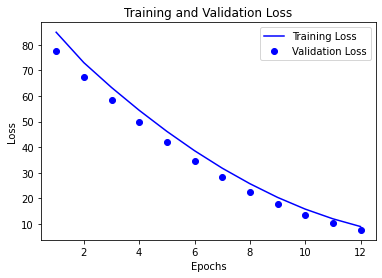

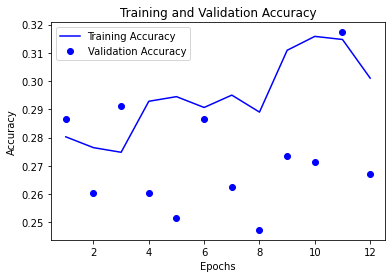

Training Loss & Accuracy: 
58/58 [==============================] - 1s 9ms/step - loss: 7.6606 - accuracy: 0.3503

Validation Loss & Accuracy: 
15/15 [==============================] - 0s 9ms/step - loss: 7.6759 - accuracy: 0.2670

Test Loss & Accuracy: 
18/18 [==============================] - 0s 7ms/step - loss: 7.6696 - accuracy: 0.3100

Confusion Matrix:
 [[  0  13  23  60]
 [  0  15  39 106]
 [  0   8  49 102]
 [  0  12  31 113]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.31      0.09      0.14       160
                      INFORMATION SYSTEMS RESEARCH       0.35      0.31      0.33       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.30      0.72      0.42       156

                                          accuracy                       

In [16]:
# Update below parameters as required
inp_max_len = 200      # only these many number of words from the start of input text will be considered  
vocab_count = 10000    # currently this field is not being used to choose vocabulary size
emb_vec_len = 64       # cannot exceed 100 as glove.6B.100d is being used

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count to desired value 
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

# Convert the input to fixed length sequences 
x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

# Build the embedding index and embedding matrix (weight matrix) from the pretrained GloVe 100d model 
embedding_matrix = build_embindex_embmatrix(emb_vec_len, word_index, max_words = max_words + 1)

# Define and train the model 
history_pt_emb, model_pt_emb = train_pt_emb_model(x_train_fixlen, y_train, x_val_fixlen, y_val,
                                                  emb_vec_len, inp_max_len, embedding_matrix, max_words = max_words + 1, 
                                                  num_hidden_units_1 = 64, num_hidden_units_2 = 16,  
                                                  epochs = 12, batch_size = 128, learning_rate = 0.0001)
# plot the learning curves
plot_learning(history_pt_emb)

print('Training Loss & Accuracy: ') 
model_pt_emb.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_pt_emb.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_pt_emb.evaluate(x_test_fixlen, y_test)

# Display the test metrics -> Confusion matrix & Classification report
print_metrics(model_pt_emb, x_test_fixlen, y_test, target_dict)

__Define a simple Recurrent Neural Network (stacked RNN in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to RNN layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - RNN layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the RNN layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [17]:
# Create a NN model by learning word embeddings with the Embedding layer and using Simple RNN

def train_rnn_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, rnn_nodes, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_rnn = models.Sequential()
    model_rnn.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_rnn.add(layers.SimpleRNN(rnn_nodes, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
    model_rnn.add(layers.SimpleRNN(rnn_nodes, dropout = 0.2, recurrent_dropout = 0.2))
    model_rnn.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_rnn.add(layers.Dropout(0.5))
    model_rnn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_rnn.add(layers.Dropout(0.5))
    model_rnn.add(layers.Dense(4, activation = 'softmax'))

    model_rnn.summary()

    model_rnn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_rnn = model_rnn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_rnn, model_rnn)

# 4) Recurrent Neural Network (RNN) model:
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 14362 unique tokens in training data

x_train_fixlen shape : (1827, 200)
x_val_fixlen shape   : (457, 200)
x_test_fixlen shape  : (571, 200)
y_train shape        : (1827,)
y_val shape          : (457,)
y_test shape         : (571,)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           919232    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 200, 64)           8256      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
____________

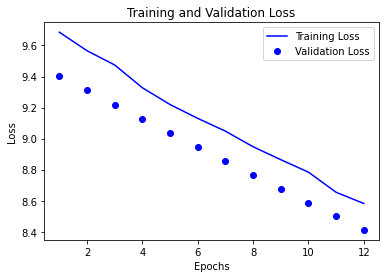

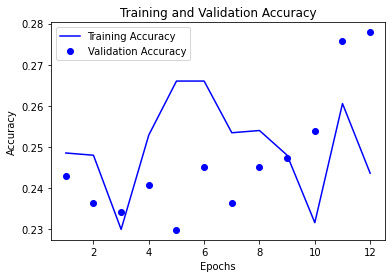

Training Loss & Accuracy: 
58/58 [==============================] - 2s 33ms/step - loss: 8.4071 - accuracy: 0.2474

Validation Loss & Accuracy: 
15/15 [==============================] - 0s 32ms/step - loss: 8.4115 - accuracy: 0.2779

Test Loss & Accuracy: 
18/18 [==============================] - 1s 30ms/step - loss: 8.3993 - accuracy: 0.3100

Confusion Matrix:
 [[ 18   9  60   9]
 [ 15  23  90  32]
 [ 15  18 106  20]
 [ 28  18  80  30]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.24      0.19      0.21        96
                                     MIS QUARTERLY       0.34      0.14      0.20       160
                      INFORMATION SYSTEMS RESEARCH       0.32      0.67      0.43       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.33      0.19      0.24       156

                                          accuracy                    

In [18]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 200
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_rnn, model_rnn = train_rnn_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                         max_words = max_words + 1, rnn_nodes = 64, num_hidden_units_1 = 64, 
                                         num_hidden_units_2 = 32, epochs = 12, batch_size = 128, learning_rate = 0.0001)

plot_learning(history_rnn)

print('Training Loss & Accuracy: ') 
model_rnn.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_rnn.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_rnn.evaluate(x_test_fixlen, y_test)

print_metrics(model_rnn, x_test_fixlen, y_test, target_dict)

__Define a Long Short Term Memory model (stacked LSTM in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to LSTM layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - LSTM layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the LSTM layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [19]:
# Create a NN model by learning word embeddings with the Embedding layer and using LSTM

def train_lstm_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, lstm_nodes, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_lstm = models.Sequential()
    model_lstm.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_lstm.add(layers.LSTM(lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
    model_lstm.add(layers.LSTM(lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2))
    model_lstm.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_lstm.add(layers.Dropout(0.5))
    model_lstm.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_lstm.add(layers.Dropout(0.5))
    model_lstm.add(layers.Dense(4, activation = 'softmax'))

    model_lstm.summary()

    model_lstm.compile(loss = 'sparse_categorical_crossentropy', 
                       optimizer = optimizers.RMSprop(lr = learning_rate), 
                       metrics = ['accuracy'])

    history_lstm = model_lstm.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                  validation_data = (x_val, y_val))
    return (history_lstm, model_lstm)

# 5) Long Short Term Memory model (LSTM):
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 14362 unique tokens in training data

x_train_fixlen shape : (1827, 200)
x_val_fixlen shape   : (457, 200)
x_test_fixlen shape  : (571, 200)
y_train shape        : (1827,)
y_val shape          : (457,)
y_test shape         : (571,)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           919232    
_________________________________________________________________
lstm (LSTM)                  (None, 200, 64)           33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
____________

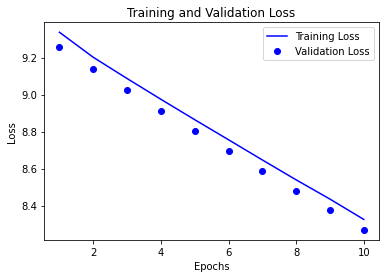

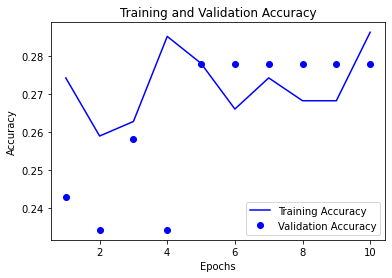

Training Loss & Accuracy: 
58/58 [==============================] - 8s 134ms/step - loss: 8.2672 - accuracy: 0.2781

Validation Loss & Accuracy: 
15/15 [==============================] - 2s 142ms/step - loss: 8.2684 - accuracy: 0.2779

Test Loss & Accuracy: 
18/18 [==============================] - 3s 157ms/step - loss: 8.2682 - accuracy: 0.2785

Confusion Matrix:
 [[  0   0  96   0]
 [  0   0 160   0]
 [  0   0 159   0]
 [  0   0 156   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.00      0.00      0.00       160
                      INFORMATION SYSTEMS RESEARCH       0.28      1.00      0.44       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                 

In [20]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 200
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_lstm, model_lstm = train_lstm_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                            max_words = max_words + 1, lstm_nodes = 64, num_hidden_units_1 = 64, 
                                            num_hidden_units_2 = 32, epochs = 10, batch_size = 128, learning_rate = 0.0001)

plot_learning(history_lstm)

print('Training Loss & Accuracy: ') 
model_lstm.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_lstm.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_lstm.evaluate(x_test_fixlen, y_test)

print_metrics(model_lstm, x_test_fixlen, y_test, target_dict)

__Define a Bi-directional Long Short Term Memory (stacked Bi-dir LSTM in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to Bi-dir LSTM layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - Bi-dir LSTM layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the Bi-dir LSTM layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [21]:
# Create a NN model by learning word embeddings with the Embedding layer and using Bi-directional LSTM

def train_bidir_lstm_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, bidir_lstm_nodes, 
                           num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_bidir_lstm = models.Sequential()
    model_bidir_lstm.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_bidir_lstm.add(layers.Bidirectional(layers.LSTM(bidir_lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2, 
                                                          return_sequences=True)))
    model_bidir_lstm.add(layers.Bidirectional(layers.LSTM(bidir_lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2)))
    model_bidir_lstm.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_bidir_lstm.add(layers.Dropout(0.5))
    model_bidir_lstm.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_bidir_lstm.add(layers.Dropout(0.5))
    model_bidir_lstm.add(layers.Dense(4, activation = 'softmax'))

    model_bidir_lstm.summary()

    model_bidir_lstm.compile(loss = 'sparse_categorical_crossentropy', 
                             optimizer = optimizers.RMSprop(lr = learning_rate), 
                             metrics = ['accuracy'])

    history_bidir_lstm = model_bidir_lstm.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                              validation_data = (x_val, y_val))
    return (history_bidir_lstm, model_bidir_lstm)

# 6) Bi-directional Long Short Term Model (Bi-dir LSTM):
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 14362 unique tokens in training data

x_train_fixlen shape : (1827, 200)
x_val_fixlen shape   : (457, 200)
x_test_fixlen shape  : (571, 200)
y_train shape        : (1827,)
y_val shape          : (457,)
y_test shape         : (571,)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 64)           919232    
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
____________

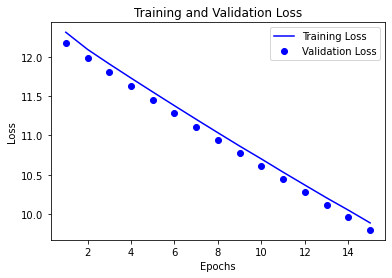

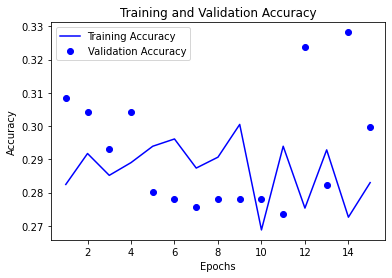

Training Loss & Accuracy: 
58/58 [==============================] - 14s 236ms/step - loss: 9.7942 - accuracy: 0.3415

Validation Loss & Accuracy: 
15/15 [==============================] - 3s 211ms/step - loss: 9.7984 - accuracy: 0.2998

Test Loss & Accuracy: 
18/18 [==============================] - 4s 229ms/step - loss: 9.7955 - accuracy: 0.3538

Confusion Matrix:
 [[  0   0  39  57]
 [  0   0  88  72]
 [  0   0  95  64]
 [  0   0  49 107]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.00      0.00      0.00       160
                      INFORMATION SYSTEMS RESEARCH       0.35      0.60      0.44       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.36      0.69      0.47       156

                                          accuracy                

In [22]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 200
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_bidir_lstm, model_bidir_lstm = train_bidir_lstm_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, 
                                                              inp_max_len, max_words = max_words + 1, bidir_lstm_nodes = 64,
                                                              num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                                              epochs = 15, batch_size = 128, learning_rate = 0.0001)

plot_learning(history_bidir_lstm)

print('Training Loss & Accuracy: ') 
model_bidir_lstm.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_bidir_lstm.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_bidir_lstm.evaluate(x_test_fixlen, y_test)

print_metrics(model_bidir_lstm, x_test_fixlen, y_test, target_dict)

__Build traditional Machine Learning models:__
 - Train the model 
 - Determine Training and Test Accuracy 
 - Predict on Test data and display the Confusion Matrix and Classification Report

In [23]:
def build_ml_model(x_train, y_train, x_test, y_test, target_dict, model):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    print('Train Accuracy : %.4f' % train_acc)
    print('Test Accuracy  : %.4f' % test_acc)

    y_test_pred = model.predict(x_test)

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))
    
    return (model)

# 7) Logistic Regression model (using Cross Validation): 
 - Tune the hyper parameters as required to improve model performance
     - C parameter -> Inverse of regularization strength, smaller values specify stronger regularization

In [24]:
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(cv = 5, max_iter = 1000, random_state = 32, n_jobs = -1, class_weight = None, 
                                Cs = [0.00001])
                                #Cs = np.logspace(-10, -1, 10)) 
model_lr = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_lr)

Train Accuracy : 0.2824
Test Accuracy  : 0.2802

Confusion Matrix:
 [[  0  96   0   0]
 [  0 160   0   0]
 [  0 159   0   0]
 [  0 156   0   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.28      1.00      0.44       160
                      INFORMATION SYSTEMS RESEARCH       0.00      0.00      0.00       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                           0.28       571
                                         macro avg       0.07      0.25      0.11       571
                                      weighted avg       0.08      0.28      0.12       571



# 8) Multinomial Naive Bayes: 
 - Tune the hyper parameters as required to improve model performance
     - Alpha hyper parameter is the smoothing parameter which helps:  
       - with unseen words in test data so that entire probability doesnt become zero
       - with words that occur more / less frequently in training and test data, by moving likelihood probabilities to uniform          distribution

In [25]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB(alpha = 20000)
model_nb = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_nb)

Train Accuracy : 0.3678
Test Accuracy  : 0.3380

Confusion Matrix:
 [[  0  94   2   0]
 [  0 144  16   0]
 [  0 110  49   0]
 [  0 130  26   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.30      0.90      0.45       160
                      INFORMATION SYSTEMS RESEARCH       0.53      0.31      0.39       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                           0.34       571
                                         macro avg       0.21      0.30      0.21       571
                                      weighted avg       0.23      0.34      0.23       571



# 9) Linear Support Vector Classifier model (Linear SVC): 
 - Tune the hyper parameters as required to improve model performance
   - C parameter -> Inverse of regularization strength, smaller values specify stronger regularization

In [26]:
from sklearn.svm import LinearSVC

model_lsvc = LinearSVC(max_iter = 10000, class_weight = 'balanced', C = 0.000001)
model_lsvc = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_lsvc)

Train Accuracy : 0.3975
Test Accuracy  : 0.3468

Confusion Matrix:
 [[  0  84  12   0]
 [  0 110  50   0]
 [  0  71  88   0]
 [  0  90  66   0]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.31      0.69      0.43       160
                      INFORMATION SYSTEMS RESEARCH       0.41      0.55      0.47       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.00      0.00      0.00       156

                                          accuracy                           0.35       571
                                         macro avg       0.18      0.31      0.22       571
                                      weighted avg       0.20      0.35      0.25       571



# 10) Random Forest Classifier: 
 - Tune the hyper parameters as required to improve model performance

In [27]:
from sklearn.ensemble import RandomForestClassifier

#maximum_features = max_words
maximum_features = 200

model_rf = RandomForestClassifier(n_jobs = -1, random_state = 32, oob_score = 'True', criterion = 'gini', 
                                  n_estimators = 5, max_depth = 3, max_features = maximum_features)
                                  
model_rf = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_rf)

Train Accuracy : 0.3529
Test Accuracy  : 0.3275

Confusion Matrix:
 [[ 0 39 14 43]
 [ 1 60 39 60]
 [ 0 37 59 63]
 [ 0 48 40 68]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.00      0.00      0.00        96
                                     MIS QUARTERLY       0.33      0.38      0.35       160
                      INFORMATION SYSTEMS RESEARCH       0.39      0.37      0.38       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.29      0.44      0.35       156

                                          accuracy                           0.33       571
                                         macro avg       0.25      0.30      0.27       571
                                      weighted avg       0.28      0.33      0.30       571



# 11) XG Boost Classifier: 
 - Tune the hyper parameters as required to improve model performance
   - learning_rate: After each boosting step, gets the weights of new features and shrinks the feature weights to make the          boosting process more conservative, thus controlling overfitting

In [28]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(n_jobs = -1, random_state = 32, verbosity = 0, 
                           n_estimators = 4, learning_rate = 0.0000001, max_depth = 3)
                                  
model_xgbc = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_xgbc)

Train Accuracy : 0.3975
Test Accuracy  : 0.3730

Confusion Matrix:
 [[  4  26  12  54]
 [  0  48  36  76]
 [  1  36  58  64]
 [  1  18  34 103]]

Classification Report:
                                                      precision    recall  f1-score   support

JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       0.67      0.04      0.08        96
                                     MIS QUARTERLY       0.38      0.30      0.33       160
                      INFORMATION SYSTEMS RESEARCH       0.41      0.36      0.39       159
         JOURNAL OF MANAGEMENT INFORMATION SYSTEMS       0.35      0.66      0.45       156

                                          accuracy                           0.37       571
                                         macro avg       0.45      0.34      0.31       571
                                      weighted avg       0.43      0.37      0.34       571



# Summary of Model peformance:
 - Score all the models for Training, Validation and Test data
 - Load the results into a Dataframe and display the results sorted by Test accuracy 

In [29]:
model_dl = {'embedding': model_emb, 
            'Pre-trained embedding': model_pt_emb, 
            'RNN': model_rnn, 
            'LSTM': model_lstm, 
            'Bi-directional LSTM': model_bidir_lstm}

model_ml = {'Logistic Regression': model_lr, 
            'Multinomial NB': model_nb, 
            'Linear SVC': model_lsvc, 
            'Random Forest Classifier': model_rf, 
            'XGBoost Classifier': model_xgbc}

def dl_models(x, y, model): 
    loss, accuracy = model.evaluate(x, y)
    return (accuracy)

def ml_models(x, y, model): 
    accuracy = model.score(x, y)
    return (accuracy)

results = []

# Simple NN alone is kept outside the loop, as it uses one hot encoded inputs (rather than fixed length sequences)
accuracy_train = dl_models(x_train_one_hot, y_train, model_snn)
accuracy_val = dl_models(x_val_one_hot, y_val, model_snn)
accuracy_test = dl_models(x_test_one_hot, y_test, model_snn) 
results.append(['Simple NN', accuracy_train, accuracy_val, accuracy_test])

for model_name, model in model_dl.items():
    accuracy_train = dl_models(x_train_fixlen, y_train, model)
    accuracy_val = dl_models(x_val_fixlen, y_val, model)
    accuracy_test = dl_models(x_test_fixlen, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])
    
for model_name, model in model_ml.items():
    accuracy_train = ml_models(x_train_one_hot, y_train, model)
    accuracy_val = ml_models(x_val_one_hot, y_val, model)
    accuracy_test = ml_models(x_test_one_hot, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])

column = ['Model name', 'Training Acc', 'Val Acc', 'Test Acc']

df_results = pd.DataFrame(results, columns = column)
df_results.sort_values(by = ['Test Acc'], ascending = False, inplace = True)
df_results.reset_index(drop = True, inplace = True)
df_results.round(4)

18/18 [==============================] - 4s 224ms/step - loss: 9.7955 - accuracy: 0.3538


,Model name,Training Acc,Val Acc,Test Acc
0,XGBoost Classifier,0.3919,0.4201,0.3730
1,Bi-directional LSTM,0.3415,0.2998,0.3538
2,Linear SVC,0.3963,0.4026,0.3468
3,Multinomial NB,0.3667,0.3720,0.3380
4,Random Forest Classifier,0.3547,0.3457,0.3275
5,Pre-trained embedding,0.3503,0.2670,0.3100
6,RNN,0.2474,0.2779,0.3100
7,Logistic Regression,0.2830,0.2801,0.2802
8,Simple NN,0.2813,0.2779,0.2785
9,embedding,0.2781,0.2779,0.2785


__Inferences__: 
 - Overall accuracies of all the models are ranging between 27% to 37%
 - XG Boost classifier is the best performing model  
 - On an overall basis, we see Traditional ML models performing better than the Deep Learning Neural Networks. This should be      due to the fact that our input volume of records is very low for DL models to function efficiently 
 - Varying accuracies noted from run to run with same parameters for the DL NN models  